In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [7]:
X,y = df.iloc[:,0].values,df.iloc[:,-1].values

In [8]:
X.shape

(200,)

In [9]:
y.shape

(200,)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
X_train.shape

(160,)

In [13]:
X_train

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [14]:
y_train

array([3.13, 3.91, 2.25, 2.3 , 4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08,
       4.14, 2.6 , 2.44, 2.71, 2.72, 1.63, 2.31, 2.51, 3.5 , 2.24, 2.58,
       2.42, 2.54, 4.37, 2.17, 3.14, 2.19, 3.54, 1.54, 2.72, 3.98, 2.46,
       3.  , 1.98, 2.65, 3.75, 3.67, 2.93, 3.08, 2.21, 2.84, 3.76, 3.03,
       2.09, 3.26, 2.16, 2.7 , 3.83, 2.88, 3.16, 3.04, 3.13, 3.04, 4.6 ,
       3.26, 2.85, 2.09, 3.31, 3.89, 1.87, 3.11, 2.4 , 3.48, 3.08, 2.76,
       2.93, 3.39, 2.35, 3.08, 2.14, 3.24, 1.73, 3.24, 3.44, 2.69, 3.33,
       2.42, 2.57, 3.55, 2.66, 1.53, 2.98, 2.84, 3.52, 3.16, 3.82, 2.6 ,
       1.61, 2.2 , 2.99, 3.12, 2.74, 2.83, 2.77, 2.35, 2.19, 3.42, 4.02,
       3.89, 3.15, 3.99, 3.42, 3.08, 2.46, 2.61, 3.49, 3.76, 2.82, 4.03,
       2.99, 2.73, 2.18, 3.09, 3.96, 2.1 , 3.33, 4.62, 3.47, 2.48, 4.43,
       4.11, 3.44, 3.18, 3.02, 4.06, 2.26, 1.48, 2.94, 2.89, 2.72, 3.09,
       2.73, 4.36, 3.  , 3.79, 2.59, 2.87, 3.57, 1.37, 3.6 , 2.43, 3.33,
       2.31, 3.4 , 3.89, 4.25, 3.26, 3.67, 2.79, 3.

In [15]:
y_train.shape

(160,)

In [17]:
class MeraLR:
    def __init__(self):
        self.m = None
        self.b = None
        
    
    def fit(self,X_train,y_train):
        num = np.sum((y_train - np.mean(y_train))* (X_train - np.mean(X_train)))
        den = np.sum((X_train - np.mean(X_train))**2)
        self.m = num/den
        self.b = np.mean(y_train) - self.m * np.mean(X_train)
        return self.m,self.b
    
    def predict(self,X_test):
        return self.m*X_test + self.b

In [18]:
mlr =MeraLR()

In [19]:
mlr.fit(X_train,y_train)

(np.float64(0.557951973425072), np.float64(-0.8961119222429144))

In [25]:
mlr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

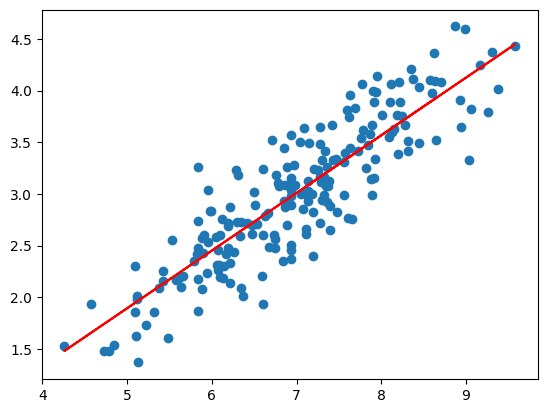

In [26]:
plt.scatter(X,y)
plt.plot(X_train,mlr.predict(X_train),color='red')

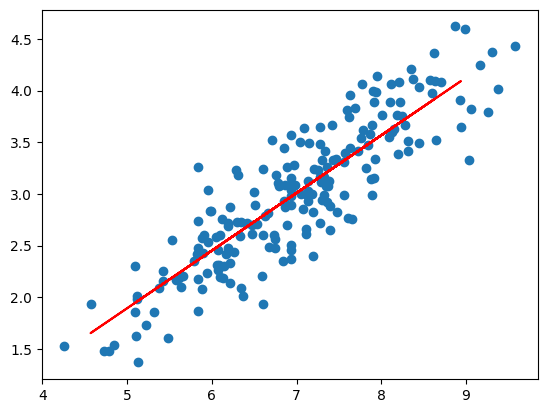

In [27]:
plt.scatter(X,y)
plt.plot(X_test,mlr.predict(X_test),color='red')

In [254]:
class MeraLR:
    def __init__(self):
        self.slope = None
        self.intercept = None
        
        
    def fit(self,X,y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        
        numerator = np.sum((X - mean_x) * (y - mean_y))
        denominator = np.sum((X - mean_x) ** 2)
        self.slope =  numerator / denominator
        self.intercept = mean_y - self.slope*mean_x
        
    
    def predict(self, X):
        """
        Make predictions using the line equation y = mx + b
        """
        return self.slope * X + self.intercept
    
    def calculate_error(self,X_test):
        y_pred = self.predict(X_test)
        mse = np.mean((y_test - y_pred) ** 2)
        rmse = np.sqrt(mse)
        return mse,rmse
        
        
        
        

In [255]:
np.sqrt(0.12129235313495527)

np.float64(0.34827051717731616)

In [256]:
mlr = MeraLR()

In [257]:
mlr.fit(X_train,y_train)

In [258]:
mlr.calculate_error(X_test)

(np.float64(0.12129235313495527), np.float64(0.34827051717731616))

In [259]:
mlr.predict(X_test)

112    3.891116
29     3.093245
182    2.384646
199    2.574349
193    1.653729
85     1.776478
10     2.072193
54     2.931439
115    3.762787
35     2.937018
12     4.091979
92     3.511709
13     2.970495
126    2.401384
174    3.188097
2      3.467073
44     1.943864
3      3.243892
113    2.976075
14     3.416857
23     2.557611
25     3.165778
6      2.858905
134    3.121142
165    3.684674
173    2.870064
45     3.494970
65     3.344323
48     3.919014
122    1.960602
178    3.651197
64     3.210415
9      3.740469
57     2.786371
78     2.780792
71     3.271789
128    3.528447
176    2.613406
131    2.658042
53     2.713837
Name: cgpa, dtype: float64

In [260]:
from sklearn.linear_model import LinearRegression

In [262]:
lr = LinearRegression()

In [263]:
X_train = X_train.values.reshape(-1,1)

In [264]:
lr.fit(X_train,y_train)

LinearRegression()

In [265]:
X_test = X_test.values.reshape(-1,1)

In [266]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [267]:
mlr.predict(X_test).shape

(40, 1)

In [268]:
mlr.predict(X_test).T[0]

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [269]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [270]:


pd.DataFrame({

    "my_pred":mlr.predict(X_test).T[0],
    "lr_pred":lr.predict(X_test)
    
})


,my_pred,lr_pred
0,3.891116,3.891116
1,3.093245,3.093245
2,2.384646,2.384646
3,2.574349,2.574349
4,1.653729,1.653729
5,1.776478,1.776478
6,2.072193,2.072193
7,2.931439,2.931439
8,3.762787,3.762787
9,2.937018,2.937018
